<center> <img src = https://i.pinimg.com/originals/c8/02/bd/c802bdea08d770ac67437962a976f206.png alt="drawing" style="width:600px;">

# <center> Проект: Анализ резюме из HeadHunter
   

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Исследование структуры данных

1. Прочитаем данные с помощью библиотеки Pandas.

In [2]:
hh_data = pd.read_csv('data/dst-3.0_16_1_hh_database.csv', sep=';')
hh_data.shape

(44744, 12)

2. Выведем несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены.

In [3]:
display(hh_data.head()) # 5 первых строк
display(hh_data.tail()) # 5 последних строк

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано
3,"Мужчина , 38 лет , родился 25 июня 1980",100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,OpenSoft,Инженер-программист,Высшее образование 2002 Саратовский государст...,08.04.2019 14:23,Не указано
4,"Женщина , 26 лет , родилась 3 марта 1993",140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Опыт работы 5 лет 7 месяцев Региональный мене...,Мармелад,Менеджер по продажам,Высшее образование 2015 Кгу Психологии и педаг...,22.04.2019 10:32,Не указано


,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
44739,"Мужчина , 30 лет , родился 17 января 1989",50000 руб.,"Финансист, аналитик, экономист, бухгалтер, мен...","Тверь , готов к переезду (Москва, Химки) , гот...",полная занятость,"полный день, удаленная работа","Опыт работы 7 лет 7 месяцев Финансист, аналит...","ООО ""IAS"" (независимый участник объединения Ru...",Руководитель субгруппы,Высшее образование 2015 Московский гуманитарн...,22.04.2019 12:32,Не указано
44740,"Мужчина , 27 лет , родился 5 марта 1992",39000 руб.,"Системный администратор, IT-специалист","Липецк , готов к переезду , готов к командировкам","проектная работа, частичная занятость, полная ...","удаленная работа, гибкий график, полный день, ...","Опыт работы 7 лет Системный администратор, IT...",ИП Пестрецов,Предприниматель,Высшее образование (Бакалавр) 2016 Воронежски...,22.04.2019 13:11,Не указано
44741,"Женщина , 48 лет , родилась 26 декабря 1970",40000 руб.,"Аналитик данных, Математик","Челябинск , готова к переезду , готова к редки...",полная занятость,"полный день, удаленная работа",Опыт работы 21 год 5 месяцев Январь 1998 — по...,"ОАО «ЧМК», Исследовательско-Технологический Це...",Начальник группы аналитики,Высшее образование 2000 Южно-Уральский госуда...,09.04.2019 05:07,Не указано
44742,"Мужчина , 24 года , родился 6 октября 1994",20000 руб.,Контент-менеджер,"Тамбов , не готов к переезду , не готов к кома...","частичная занятость, полная занятость",удаленная работа,Опыт работы 3 года 10 месяцев Контент-менедже...,IQ-Maxima,Менеджер проектов,Высшее образование 2015 Тамбовский государств...,26.04.2019 14:25,Имеется собственный автомобиль
44743,"Мужчина , 38 лет , родился 25 апреля 1980",120000 руб.,Руководитель проекта,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 15 лет 10 месяцев Руководитель пр...,ПАО ГК ТНС энерго,Руководитель отдела технической поддержки,Высшее образование 1997 Южно-Российский госуд...,05.07.2018 20:15,Не указано


3. Выведем основную информацию о числе непустых значений в столбцах и их типах в таблице.

4. Обратим внимание на информацию о числе непустых значений.

In [4]:
hh_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

5. Выведем основную статистическую информацию о столбцах.


In [5]:
hh_data.describe()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 1987 Военный инженерный Кра...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создадим с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполним преобразование, ответим на контрольные вопросы и удалим признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [6]:
# С помощью метода apply и lambda-функции, создаем новый признак 
hh_data['Образование'] = hh_data['Образование и ВУЗ'].apply(lambda x: x.split(' ')[0] if (x.split(' ')[1]) == 'образование' else ' '.join(x.split(' ')[:2]))
# Проверим полученные категории
hh_data['Образование'].unique()
# Удаляем столбец 'Образование и ВУЗ'
hh_data = hh_data.drop('Образование и ВУЗ', axis=1) 

Узнаем cколько соискателей имеет средний уровень образования (школьное образование)

In [7]:
hh_data['Образование'].value_counts()['Среднее']

559

2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создадим два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполним преобразование, ответим на контрольные вопросы и удалитм признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [8]:
# Создаем признак 'Пол'
hh_data['Пол'] = hh_data['Пол, возраст'].apply(lambda x: x[0])
# Создаем признак 'Возраст'
hh_data['Возраст'] = hh_data['Пол, возраст'].apply(lambda x: int(x.split()[2]))
# Удаляем признак 'Пол, возраст'
hh_data = hh_data.drop('Пол, возраст', axis=1)

Узнаем сколько процентов женских резюме представлено в наших данных.

In [9]:
(hh_data['Пол'].value_counts(normalize=True)['Ж'] * 100).round(2)

19.07

Выясним чему равен средний возраст соискателей.

In [10]:
hh_data['Возраст'].mean().round(1)

32.2

3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [11]:
def experience(arg):
    """
    Функция выделяет общий опыт работы соискателя в месяцах

    Args:
        arg (str): Строка столбца в формате <Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>

    Returns:
        int: Опыт работы, в месяцах
    """
    if arg is np.NaN:
        return np.NaN
    if arg == 'Не указано':
        return np.NaN
    arg_split = arg.split(' ')[:6]
    year, month = 0, 0
    for i, elem in enumerate(arg_split):
        if elem in ['лет', 'года', 'год']:
            year = int(arg_split[i-1])
        if elem in ['месяц', 'месяцев', 'месяца']:
            month = int(arg_split[i-1])    
    return int(year * 12 + month)

# Создаем новый признак, применив нашу функцию для преобразования
hh_data['Опыт работы(месяц)'] = hh_data['Опыт работы'].apply(experience)

# Удалим ненужный столбец
hh_data = hh_data.drop('Опыт работы', axis=1)


Посчитаем чему равен медианный опыт работы (в месяцах) в нашей таблице

In [12]:
hh_data['Опыт работы(месяц)'].median()

100.0

4.Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполним преобразования и удалим столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [13]:
def get_cities(arg):
    """
    Функция выделяет город из строки, если это Москва или Санкт-Петербург, оставляет название, если это другой город-миллионник, заменяет
    название на "город-миллионник", во всех остальных случаях заменяет название города на "другие".

    Args:
        arg (str): Строка столбца.

    Returns:
        str: Название города либо название категории, к которой он относитсяю
    """
    million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород', 'Казань', 'Челябинск', 'Омск',
                      'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж', 'Волгоград' ]
    city = arg.split(' , ')[0]
    if city in ['Москва', 'Санкт-Петербург']:
        return city
    elif city in million_cities:
        return 'город-миллионник'
    else:
        return 'другие'
    
# Применяем функцию, создаем признак Город
hh_data['Город'] = hh_data['Город, переезд, командировки'].apply(get_cities)

In [14]:
def get_move(arg):
    """
    Функция определяет готовность кандидата к  переезду.

    Args:
        arg (str): Строка из столбца.

    Returns:
        str: Возвращает True или False, в зависимости от того готов человек к переезду или нет.
    """
    if ('не готов к переезду' in arg) or ('не готова к переезду' in arg):
        return False
    else:
        return True
 
# Применяем функцию, создаем признак Готовность к переезду    
hh_data['Готовность к переезду'] = hh_data['Город, переезд, командировки'].apply(get_move)

In [15]:
def business_trip(arg):
    """
    Функция для определения готовности кандидатов к командировкам.

    Args:
        arg (str): Строка из столбца.

    Returns:
        str: Булевое значение в зависимости от того готов к переезду кандтдат или нет.
    """
    arg_split = arg.split(',')
    for elem in arg_split:
        if 'командировкам' in elem: # В каждом элементе списка проверяем наличие ключевого слова
            return 'не' not in elem # если слово найдено, выполняется это условие, если 'не' нет в элементе возвращается False, иначе True
    return False

# Применяем функцию, создаем признак Готовность к командировкам
hh_data['Готовность к командировкам'] = hh_data['Город, переезд, командировки'].apply(business_trip)

# Удаляем ненужный столбец
hh_data = hh_data.drop('Город, переезд, командировки', axis=1)

Найдем сколько процентов соискателей живут в Санкт-Петербурге.

In [16]:
res = round(hh_data['Город'].value_counts(normalize=True)['Санкт-Петербург'] * 100)
print(f'{res}% соискателей проживают в Санкт-Петербурге')

11% соискателей проживают в Санкт-Петербурге


Узнаем сколько процентов соискателей готовы одновременно и к переездам, и к командировкам.

In [17]:
mobile = hh_data[hh_data['Готовность к переезду'] & hh_data['Готовность к командировкам']==True].shape[0]
all_applicants = hh_data.shape[0]
percent = round(mobile * 100 / all_applicants)
print(f'{percent}% соискателей готовы одновременно и к переезду, и к командировкам')

32% соискателей готовы одновременно и к переезду, и к командировкам


5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>

Выполним данное преобразование для признаков "Занятость" и "График", ответим на контрольные вопросы, после чего удалим их из таблицы.

In [18]:
# создаем список со строками(типами занятости)
type_employ = ['полная занятость', 'частичная занятость', 'проектная работа', 'стажировка', 'волонтерство']
# циклом проходимся по нашему списку, внутри цикла создаем признаки мигалки видов занятости 
for employ in type_employ:
    hh_data[employ] = hh_data['Занятость'].apply(lambda x: True if employ in x.split(', ') else False)


# создаем список с типами графиков
work_sched = ['полный день', 'удаленная работа', 'гибкий график', 'сменный график', 'вахтовый метод']
# в цикле создаем признаки - типы графиков
for shed in work_sched:
        hh_data[shed] = hh_data['График'].apply(lambda x: True if shed in x.split(', ') else False)
        

# удалим ненужные столбцы
hh_data= hh_data.drop(['Занятость', 'График'], axis=1)

Узнаем сколько людей ищут проектную работу и волонтёрство (в обоих столбцах стоит True)

In [19]:
res = hh_data[hh_data['проектная работа'] & hh_data['волонтерство']==True].shape[0]
print(f'Количество людей, ищущих проектную работу и волонтерство, составляет: {res} человек')

Количество людей, ищущих проектную работу и волонтерство, составляет: 436 человек


Узнаем сколько людей хотят работать вахтовым методом и с гибким графиком (в обоих столбцах стоит True)

In [20]:
res = hh_data[hh_data['вахтовый метод'] & hh_data['гибкий график']==True].shape[0]
print(f'{res} человек хотят работать вахтовым методом и с гибким графиком')

2311 человек хотят работать вахтовым методом и с гибким графиком


6. Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создадим новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [21]:
exchange_rate = pd.read_csv('data/ExchangeRates.csv', sep=',')
# Обновим признак "date" из таблицы курсов валют, переведя его в формат datetime
exchange_rate['date'] = pd.to_datetime(exchange_rate['date'], dayfirst=True, format="%d/%m/%y")
# Избавимся от неинформативных столбцов в таблице с курсами валют
exchange_rate = exchange_rate.drop(['per', 'time', 'vol'], axis=1)



# Обновим признак "Обновление резюме" из таблицы с резюме, переведя его в формат datetime 
hh_data['Обновление резюме'] = pd.to_datetime(hh_data['Обновление резюме'], dayfirst=True)
# выделим из него дату
hh_data['Обновление резюме'] = hh_data['Обновление резюме'].dt.date
hh_data['Обновление резюме'] =pd.to_datetime(hh_data['Обновление резюме'], dayfirst=True)

# Выделим из столбца «ЗП» сумму желаемой заработной платы
hh_data['зп'] = hh_data['ЗП'].apply(lambda x: int(x.split()[0]))
# Выделим из столбца «ЗП» наименование валюты, в которой она исчисляется
cur_dict = {'руб.':'RUB', 'грн.':'UAH', 'USD': 'USD', 'EUR': 'EUR', 'бел.руб.':'BYN', 'KGS': 'KGS', 'сум':'UZS', 'AZN': 'AZN', 'KZT': 'KZT'}
hh_data['Валюта'] = hh_data['ЗП'].apply(lambda x: cur_dict[x.split(' ')[1]])
# Удалим старый столбец ЗП
hh_data = hh_data.drop('ЗП', axis=1)

In [22]:
# Присоединим к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты
hh_data = hh_data.merge(exchange_rate, how='left', left_on=['Валюта', 'Обновление резюме'], right_on=['currency', 'date'])

# Значение close и proportion для рубля заполним единицей 1
hh_data['close'] = hh_data['close'].fillna(1)
hh_data['proportion'] = hh_data['proportion'].fillna(1)

# Создадим новый признак "ЗП (руб)"
hh_data['ЗП (руб)'] = hh_data['зп'] * hh_data['close'] / hh_data['proportion']

# Найдем чему равна желаемая медианная заработная плата соискателей в нашей таблице (в рублях)
print(f"Желаемая медианная заработная плата соискателей составляет {hh_data['ЗП (руб)'].median()} рублей")

Желаемая медианная заработная плата соискателей составляет 59019.0 рублей


In [23]:
# Удалим лишние столбцы
hh_data = hh_data.drop(['зп', 'Валюта', 'currency', 'date', 'close', 'proportion'], axis=1)

# Исследование зависимостей в данных

1. Построим распределение признака **"Возраст"**. Ответим на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

Модальное значение признака "Возраст" составляет 30 лет.


count    44744.000000
mean        32.196741
std          7.929800
min         14.000000
25%         27.000000
50%         31.000000
75%         36.000000
max        100.000000
Name: Возраст, dtype: float64

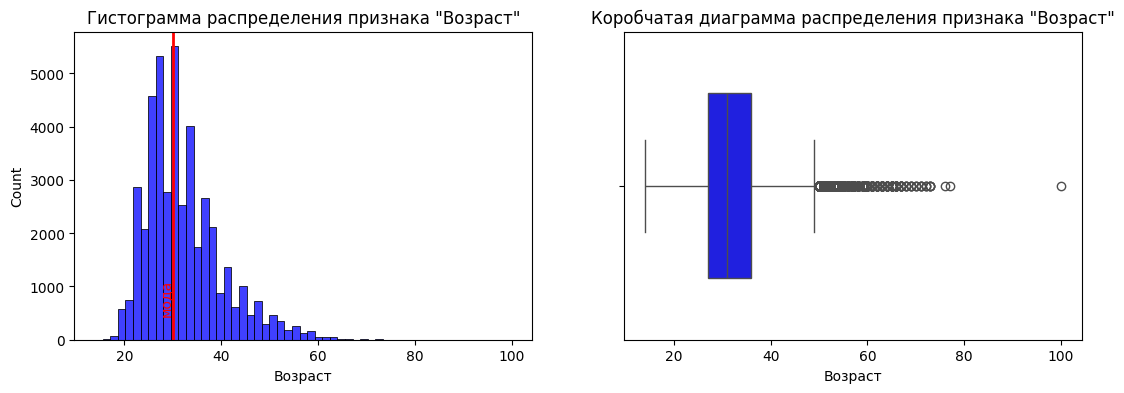

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13, 4))

hist1 = sns.histplot(
    data=hh_data,
    x='Возраст',
    bins=55,
    color='blue',
    ax=axes[0] 
)
hist1.set_title('Гистограмма распределения признака "Возраст"')
# Находим модальное значение признака "Возраст"
mod = hh_data['Возраст'].mode()[0]
print(f'Модальное значение признака "Возраст" составляет {mod} лет.')
# Отобразим на графике модальное значение  
hist1.axvline(x=mod, color='r', lw=2)
# Подпишем линию, обозначающюю модальное значение
hist1.text(mod, 500,'мода', color='r', ha='right', rotation=90)

box1 = sns.boxplot(
    data=hh_data,
    x='Возраст',
    width=0.6,
    color='blue',
    ax=axes[1]
)
box1.set_title('Коробчатая диаграмма распределения признака "Возраст"');

# основные статистические данные
hh_data['Возраст'].describe()

Выводы: 
- Модальное значение возраста составляет 30 лет.
- Максимальное значение признака составляет 100 лет.
- Минимальное значение - 14 лет.

На гистограмме мы видим, что большинство соискателей возрастом, примерно от 25 до 35 лет. 

На ящике с усами, наблюдаем, что выбросы имеются, все значения больше 50 лет, но все их я бы не спешил причислять к аномалиям, люди возрастом от 50 до 65 могут быть вполне реальными кандидатами.

Анкеты людей старше 65 лет нужно изучить более тщательно, посмотреть на какие должности они претендуют, возможно это не аномалии.

А вот возраст 100 лет, точно аномалия в данных.

--- 


2. Построим распределение признака **"Опыт работы (месяц)"**. Ответим на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

Максимальный опыт работы (в месяцах) составляет 1188 месяцев.
Мода распределения равна 81 месяц.


count    44574.000000
mean       114.418944
std         79.047861
min          1.000000
25%         57.000000
50%        100.000000
75%        154.000000
max       1188.000000
Name: Опыт работы(месяц), dtype: float64

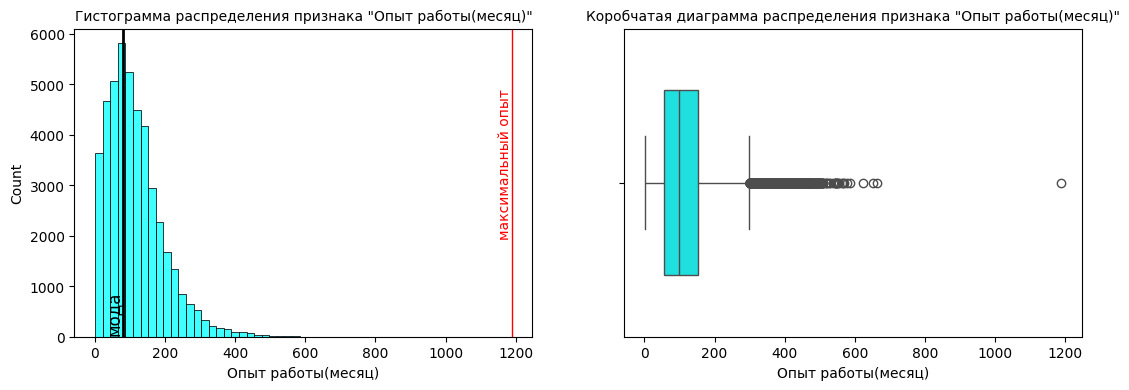

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13, 4))

hist2 = sns.histplot(
    hh_data,
    x='Опыт работы(месяц)',
    bins=55,
    color='aqua',
    ax=axes[0]
)
# Узнаем максимальный опыт, применив к признаку функцию max()
max_experience = int(hh_data['Опыт работы(месяц)'].max())
print(f'Максимальный опыт работы (в месяцах) составляет {max_experience} месяцев.')

mod_exp = int(hh_data['Опыт работы(месяц)'].mode()[0])
print(f'Мода распределения равна {mod_exp} месяц.')

# Добавим название графика
hist2.set_title('Гистограмма распределения признака "Опыт работы(месяц)"', fontsize=10)
# Отобразим на графике линию, которая обозначает максимальный опыт
hist2.axvline(max_experience, color='r', lw=1)
# Подпишем эту линию
hist2.text(max_experience, 2000,'максимальный опыт', color='r', ha='right', rotation=90)
# Отобразим на графике линию, которая обозначает модальное значение
hist2.axvline(mod_exp, color='black', lw=2)
# Подпишем линию, обозначающюю модальное значение 
hist2.text(mod_exp,100 ,'мода', color='black', ha='right', rotation=90, fontsize=12)


box2 = sns.boxplot(
    hh_data,
    x='Опыт работы(месяц)',
    color='aqua',
    width=0.6,
    ax=axes[1]
)
box2.set_title('Коробчатая диаграмма распределения признака "Опыт работы(месяц)"', fontsize=10)
# Посмитрим на основные статистические данные
hh_data['Опыт работы(месяц)'].describe()

Выводы:
- Распределение похоже на логорифмически нормальное.
- Мода распределения составляет 81 месяц
- Опыт работы большинства кандидатов находится в диапазоне от 1 месяца до, примерно 150 месяцев
- Предельным значением признака является опыт работы в 1188 месяцев
- Максимальное значение абсолютно точно является аномалией, не может быть опыта работы 99 лет, так же, на мой взгляд, аномалиями являются значения свыше 500 месяцев, врятли человек, отработавший более 40 лет ищет работу.

---

3. Построим распределение признака **"ЗП (руб)"**. Ответим на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


Мода распределения составляет 50000.0


count    4.474400e+04
mean     7.653354e+04
std      1.359315e+05
min      1.000000e+00
25%      3.708220e+04
50%      5.901900e+04
75%      9.500000e+04
max      2.430488e+07
Name: ЗП (руб), dtype: float64

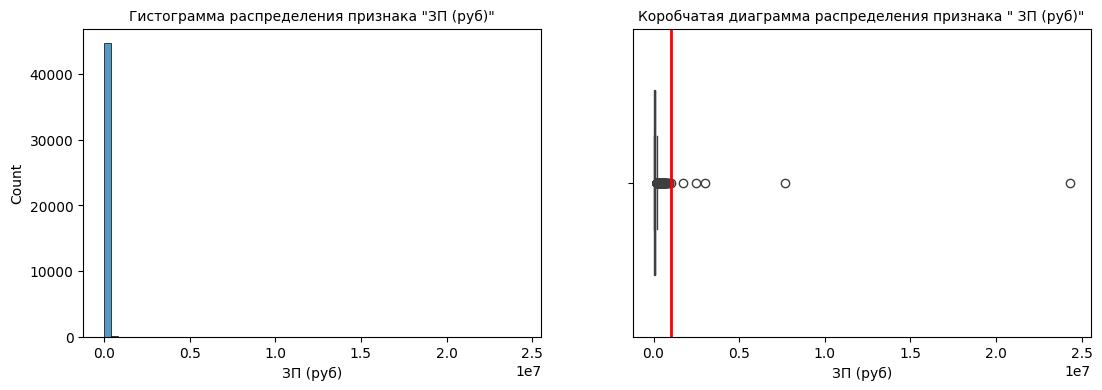

In [26]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13, 4))

hist3 = sns.histplot(
    hh_data,
    x='ЗП (руб)',
    bins=60,
    ax=axes[0]
)
hist3.set_title('Гистограмма распределения признака "ЗП (руб)"', fontsize=10)

box3 = sns.boxplot(
    hh_data,
    x='ЗП (руб)',
    width=0.6,
    ax=axes[1]
)
box3.set_title('Коробчатая диаграмма распределения признака " ЗП (руб)"', fontsize=10)
# Чтобы проще определить сколько человек хотят зарплату более 1000000, нарисуем на графике линию на отметке 1000000
box3.axvline(1000000, color='r', lw=2)

print(f'Мода распределения составляет {hh_data["ЗП (руб)"].mode()[0]}')
# Выведем основные статистические данные
hh_data['ЗП (руб)'].describe()

In [27]:
print(f'Количество соискателей с желаемой зарплатой менее 500 рублей - {hh_data[hh_data["ЗП (руб)"]<500].shape[0]}')

Количество соискателей с желаемой зарплатой менее 500 рублей - 72


Выводы:
- Модальное значение - 50000 рублей
- Максимальное значение признака составляет более 24 млн. рублей
- Заработная плата большинства соискателей находится, примерно, в интервале от 37 т. рублей до 95 т. рублей
- Аномалии есть, к ним я бы причислил значения больше 1 млн, как мы видим на графике, таких кандидатов 5, а так же зарплаты менее 500 рублей, таких кандидатов 72 человека.

Из-за аномалий интервал значений в признаке получился огромным, поэтому графики нечитаемые.

---

4. Построим диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используем данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

In [28]:
median_salaries = hh_data[hh_data['ЗП (руб)']<1_000_000].groupby('Образование')['ЗП (руб)'].median()
median_salaries

Образование
Высшее                 60000.0
Неоконченное высшее    50000.0
Среднее                40000.0
Среднее специальное    40000.0
Name: ЗП (руб), dtype: float64

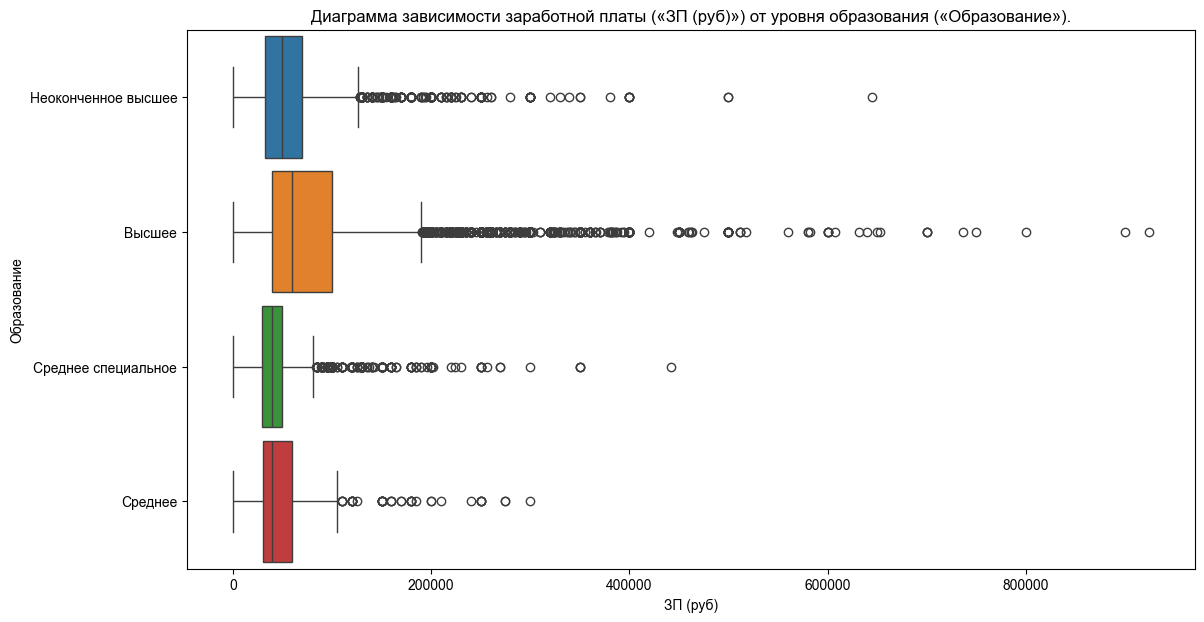

In [29]:
# оставим только зарплаты меньше миллиона
filt_data = hh_data[hh_data['ЗП (руб)']<1_000_000]

fig = plt.figure(figsize=(13,7))
box4 = sns.boxplot(
    filt_data,
    x='ЗП (руб)',
    y='Образование',
    hue='Образование',
    width=0.9
)
box4.set_title('Диаграмма зависимости заработной платы («ЗП (руб)») от уровня образования («Образование»).', fontsize=12);
sns.set_style("darkgrid") # Подключим стиль

Выводы:
Наибольший уровень желаемой заработной платы наблюдается у кандидатов с высшим образованием, наименьший у кандидатов со средним и средне-специальным образованием.

Считаю, что признак уровня образования очень важен для прогнозирования желаемой заработной платы.

---

5. Построим диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используем для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

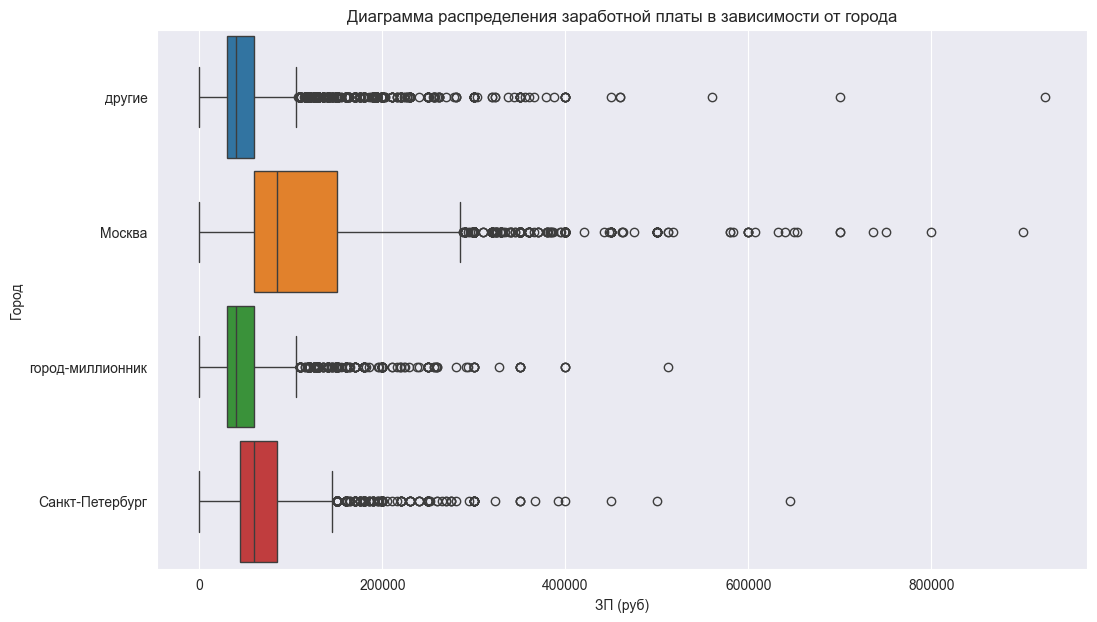

In [30]:
# оставим только зарплаты меньше миллиона
filt_data = hh_data[hh_data['ЗП (руб)']<1_000_000]

fig = plt.figure(figsize=(12, 7))
box5 = sns.boxplot(
    filt_data,
    x='ЗП (руб)',
    y='Город',
    hue='Город',
    width=0.9
)
box5.set_title('Диаграмма распределения заработной платы в зависимости от города');


Выводы:

На графике мы видим, что наибольшая желаемая медианная заработная платы у соискателей из Москвы, затем с большим отставанием идут зарплаты из Петербурга, в городах-миллионниках и во всех остальных городах медианная зарплата одинаковая и самая низкая из всех категорий, из этого можно сделать вывод, что признак города важен для прогнозирования желаемой зарплаты, только если это Санкт-Петербург или Москва. 

Можно было оставить только 3 категории в этом признаке(Москва, Санкт-Петербург и Другие).

---

6. Построим **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируем график, сравнив уровень заработной платы в категориях.

,Готовность к переезду,Готовность к командировкам,ЗП (руб)
0,False,False,40000.000
1,False,True,60000.000
2,True,False,50000.000
3,True,True,65849.455


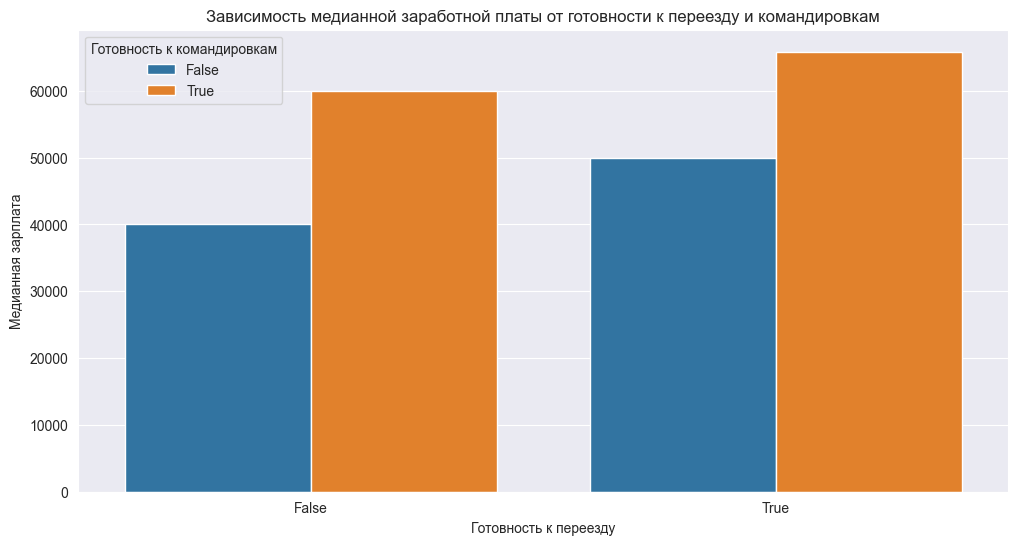

In [31]:
# Сгруппируем данные в таблицу, по которой будем строить график, as_index=False, чтобы признаки по которым группировали не стали
# индексами 
group_data = hh_data.groupby(['Готовность к переезду', 'Готовность к командировкам'], as_index=False)['ЗП (руб)'].median()
display(group_data)

fig = plt.figure(figsize=(12, 6))
# Строим столбчатую диаграмму
bar = sns.barplot(
    group_data,
    x='Готовность к переезду',
    y='ЗП (руб)',
    hue='Готовность к командировкам'     
)
bar.set_ylabel('Медианная зарплата')
bar.set_title('Зависимость медианной заработной платы от готовности к переезду и командировкам');

Выводы:

На графике мы видим, что у готовых к командировкам желаемая зарплата выше, даже если они не готовы к переезду, самая большая желаемая зарплата у кандидатов готовых к командировкам и к переезду, самая маленькая у не готовых ни к тому ни к другому, так же можем заметить, что готовность к командировкам сильнее влияет на желаемую зарплату, чем готовность к переезду.

---

7. Построим сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице построим **тепловую карту**. Проанализируем тепловую карту, сравнив показатели внутри групп.

Возраст,14,15,16,17,18,19,20,21,22,23,...,67,68,69,70,71,72,73,76,77,100
Образование,,,,,,,,,,,,,,,,,,,,,
Высшее,60000.0,0.0,122582.49,90075.5,30000.0,30000.0,30000.0,35000.0,40000.0,45000.0,...,70000.0,79000.0,112500.0,80000.0,75000.0,75000.0,62500.0,45000.0,90000.0,0.0
Неоконченное высшее,0.0,0.0,0.00,80000.0,25000.0,30000.0,31000.0,35000.0,40000.0,40000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Среднее,0.0,10000.0,0.00,44000.0,35000.0,45000.0,29000.0,40000.0,40000.0,35000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Среднее специальное,0.0,2000.0,30000.00,25000.0,25151.0,30000.0,30000.0,30000.0,30000.0,35000.0,...,120000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60000.0


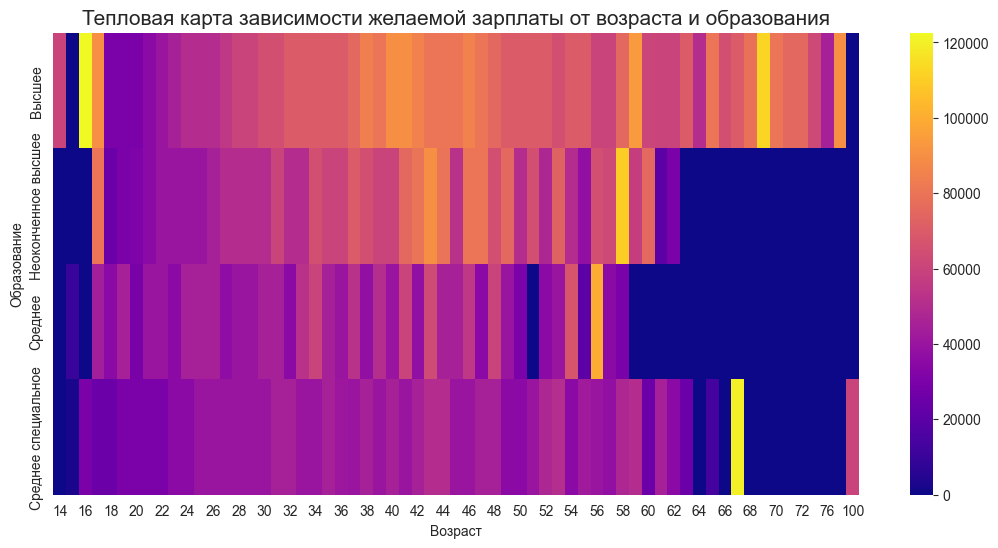

In [32]:
# Строим сводную таблицу
cumulative = hh_data.pivot_table(values='ЗП (руб)', index='Образование', columns='Возраст', aggfunc='median', fill_value=0)
display(cumulative)

fig = plt.figure(figsize=(13, 6))
# создаем тепловую карту
heatmap = sns.heatmap(cumulative, cmap='plasma')
heatmap.set_title('Тепловая карта зависимости желаемой зарплаты от возраста и образования', fontsize=15);

Выводы:
- В категории Высшее образование, уровень желаемой заработной платы растет быстрее всех, что логично, при этом он растет более плавно, чем в других категориях.
- В категории Неоконченное высшее, уровень желаемой заработной платы растет чуть медленее, к своему пику подходит не так плавно, с некоторыми скачками.
- В категории Среднее, особой зависимости от возраста не наблюдается, расброс желаемых зарплат большой.
- В категории Среднее специальное, так же тенденции роста желаемой зарплаты с увилечением возраста нет, в этой категории расброс не такой большой как в категории Среднее, так же здесь нет больших желаемых зарплат, кроме одной, возможно это специалист какой-то редкой специальности.

---


8. Построим **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведем из месяцев в года, чтобы признаки были в едином масштабе. Построим на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

7 точек лежат выше прямой


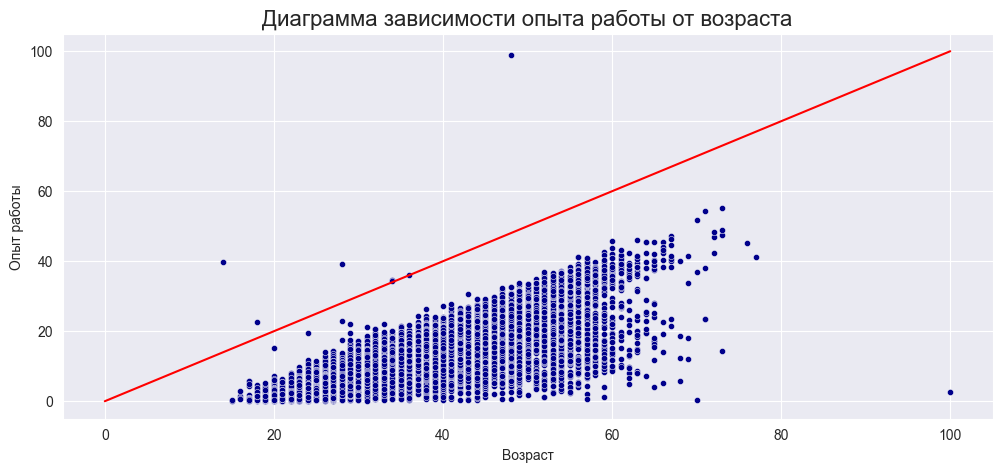

In [33]:
# Копируем исходную таблицу
hh = hh_data.copy()
# Переводим признак опыт работы из месяцев в года
hh['Опыт работы'] = hh['Опыт работы(месяц)'] / 12

fig = plt.figure(figsize=(12, 5))
# строим диаграмму рассеяния
skat = sns.scatterplot(
    hh,
    x='Возраст',
    y='Опыт работы',
    color ='darkblue',
    s=20
    )
# дополнительная прямая, проходящая через точки (0, 0) и (100, 100).
sns.lineplot(x=[0, 100], y=[0, 100], color='r')
skat.set_title('Диаграмма зависимости опыта работы от возраста', fontsize=16);

# Чтобы узнать сколько точек лежат строго выше построенной прямой, воспользуемся фильтрацией
print(f'{hh[hh["Опыт работы"]>hh["Возраст"]].shape[0]} точек лежат выше прямой')

Выводы:

На графике мы видим, что зависимость есть, с увиличением возраста растет опыт. Красная прямая соответствует значениям, когда опыт работы равен возрасту человека, наблюдаем, что есть кандидаты, чей опыть большн или равен их возрасту - это явные аномалии, так же мы видим 100-летнего человека совсем без опыта, это скорее всего тоже аномалия

---


**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу построим еще несколько любых содержательных графиков или диаграмм, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведем выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


Построим круговую диаграмму, чтобы посмотреть на рапределение соискателей по городам.

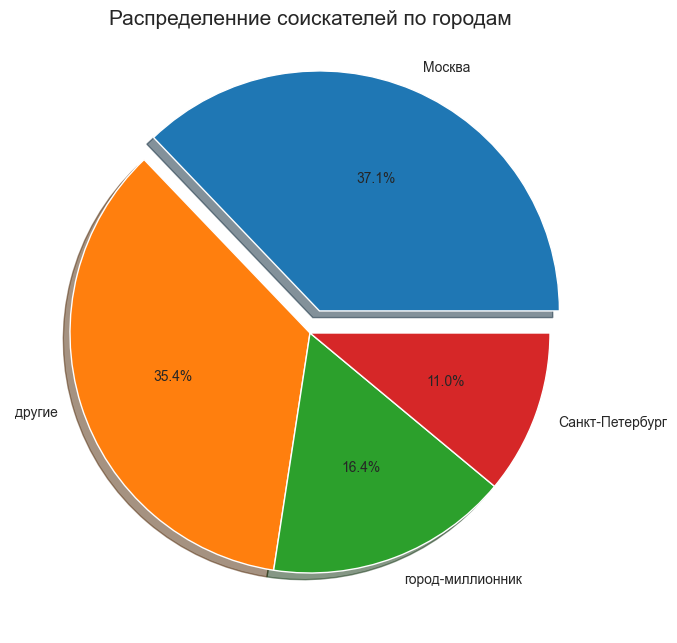

In [34]:
city = hh_data['Город'].value_counts()

fig = plt.figure(figsize=(6,6))
axes = fig.add_axes([0,0,1,1])
axes.pie(city,
         labels= city.index, # устанавливаем метки
         autopct = '%.1f%%', # Будем отображать доли в процентах и округлять их до одного знака после запятой
         shadow=True, # Добавим тень
         explode=[0.1, 0, 0, 0] # Самое рапространенное значение сместим на 10 % от центра
         )
axes.set_title('Распределенние соискателей по городам',fontsize=15);

Выводы:
Больше трети всех соискателей проживают в Москве, можно объяснить тем, что Москва - город с очень большим населением.

Построим столбчатую диаграмму, показывающюю зависимость медианной заработной платы от пола соискателя и города в котором он проживает.

,Пол,Город,ЗП (руб)
0,Ж,Москва,70000.0
1,Ж,Санкт-Петербург,50000.0
2,Ж,город-миллионник,35000.0
3,Ж,другие,30632.0
4,М,Москва,90000.0
5,М,Санкт-Петербург,60000.0
6,М,город-миллионник,45000.0
7,М,другие,45000.0


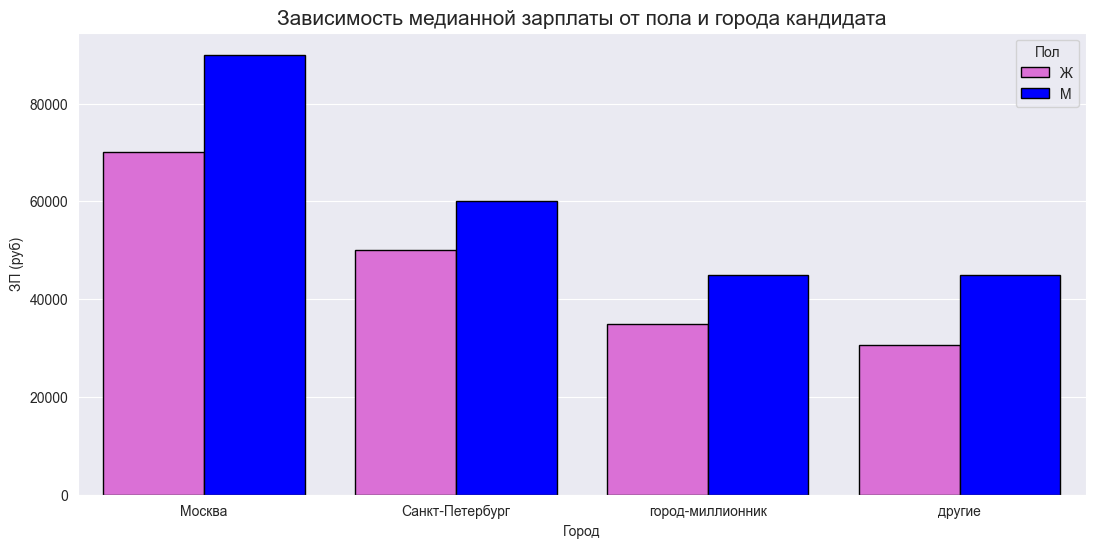

In [35]:
# построим сводную таблицу для наглядности и чтобы посчитать медианную ЗП
bar_data = hh_data.groupby(['Пол', 'Город'], as_index=False)['ЗП (руб)'].median()
display(bar_data)
fig = plt.figure(figsize=(13, 6))
bar = sns.barplot(
    bar_data,
    x='Город',
    y='ЗП (руб)',
    hue='Пол',
    palette=['orchid', 'blue'], # Устанавливаем цвета для столбцов
    saturation=1, # Пропорция исходной насыщенности цветов
    edgecolor='black' # Окантовка столбцов черного цвета
)
bar.set_title('Зависимость медианной зарплаты от пола и города кандидата', fontsize=15);

Выводы:

- На графике видно, что во всех категориях городов, заработная плата мужчин больше чем у женщин.
- В Москве разница самая ощутимая, ожидаемая медианная заработная плата женщин меньше на 20 тысяч.
- В категории "другие", эта разница составляет, примерно, 15 тысяч.
- В Санкт-Петербурге и в категории "город-миллионник", разница самая маленькая, 10 тысяч рублей.

---

Построим диаграмму зависимости медианной заработной платы от Города проживания соискателя и его готовности работать удаленно.

,удаленная работа,Город,ЗП (руб)
0,False,Москва,85000.0
1,False,Санкт-Петербург,60000.0
2,False,город-миллионник,40000.0
3,False,другие,40000.0
4,True,Москва,90000.0
5,True,Санкт-Петербург,60000.0
6,True,город-миллионник,45000.0
7,True,другие,45000.0


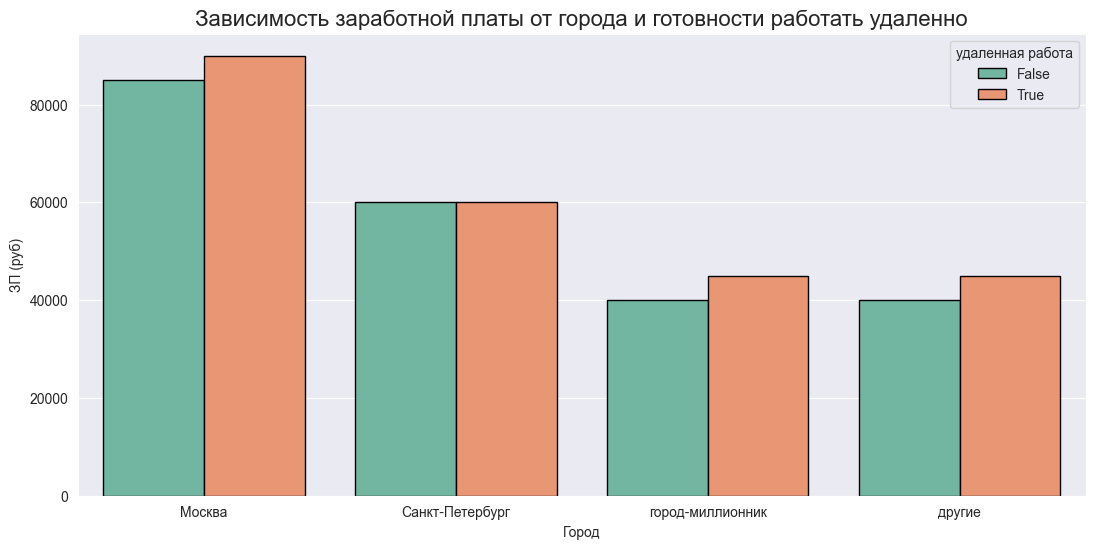

In [36]:
b_data = hh_data.groupby(['удаленная работа', 'Город'], as_index=False)['ЗП (руб)'].median()
display(b_data)
fig = plt.figure(figsize=(13, 6))
bar = sns.barplot(
    b_data,
    x='Город',
    y='ЗП (руб)',
    hue='удаленная работа',
    palette='Set2', # палитра цветов для столбцов
    edgecolor='black' # Окантовка столбцов черного цвета
)
bar.set_title('Зависимость заработной платы от города и готовности работать удаленно', fontsize=16);

Выводы:
Во всех категориях городов, кроме Санкт-Петербурга, готовые работать удаленно, хотят более васокую плату, это можно объяснить тем, что удаленно могут работать только люди умственного труда, а он, как известно, оплачивается выше, чем физический труд.

Так же это можно объяснть тем, что такие люди могут работать на компании из других городов, где зарплаты выше в целом.

---



# Очистка данных

1. Начнем с дубликатов в наших данных. Найдем **полные дубликаты** в таблице с резюме и удалим их. 

In [37]:
# создаем список по которому будем искать совпадения
col_lst = list(hh_data.columns)
# создаем маску дупликатов 
mask = hh_data.duplicated(col_lst)
# произведем фильтрацию
dupl_data = hh_data[mask]
# найдем количество полных дупликатов
print(dupl_data.shape[0])

# теперь удалим их с помощью метода drop_duplicates()
hh_data = hh_data.drop_duplicates(col_lst)
print(f'Количество записей после удаления дупликатов, состаляет {hh_data.shape[0]}')

161
Количество записей после удаления дупликатов, состаляет 44583


2. Займемся пропусками. Выведем информацию **о числе пропусков** в столбцах. 

In [38]:
hh_data.isnull().sum()

Ищет работу на должность:            0
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Обновление резюме                    0
Авто                                 0
Образование                          0
Пол                                  0
Возраст                              0
Опыт работы(месяц)                 168
Город                                0
Готовность к переезду                0
Готовность к командировкам           0
полная занятость                     0
частичная занятость                  0
проектная работа                     0
стажировка                           0
волонтерство                         0
полный день                          0
удаленная работа                     0
гибкий график                        0
сменный график                       0
вахтовый метод                       0
ЗП (руб)                             0
dtype: int64

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалим строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполним **медианным** значением.

In [39]:
# удалим строки, где есть пропуск в столбцах с местом работы и должностью
hh_data = hh_data.dropna(subset=['Последнее/нынешнее место работы', 'Последняя/нынешняя должность'], axis=0)

# Пропуски в столбце с опытом работы заполните медианным значением
hh_data = hh_data.fillna(value={'Опыт работы(месяц)': hh_data['Опыт работы(месяц)'].median()})

res = int(hh_data['Опыт работы(месяц)'].mean().round(0))
print(f'Результирующее среднее значение в столбце «Опыт работы (месяц)» после заполнения пропусков, составляет: {res}')

Результирующее среднее значение в столбце «Опыт работы (месяц)» после заполнения пропусков, составляет: 114


4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалим резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [40]:
# отфильтруем данные
outliers = hh_data[(hh_data['ЗП (руб)']>1_000_000) | (hh_data['ЗП (руб)']<1_000)]
print(f'Нашли {outliers.shape[0]} выбросов')

# удалим записи, которые попали в наш отфильтрованный DataFrame, по их индексам
hh_data = hh_data.drop(outliers.index, axis=0)

Нашли 89 выбросов


5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдем такие резюме и удалите их из данных


In [41]:
# создадим признак "Опыт работы (год)"
hh_data['Опыт работы(год)'] = round(hh_data['Опыт работы(месяц)'] / 12, 1)

# фильтруем данные
out = hh_data[hh_data['Опыт работы(год)'] > hh_data['Возраст']]

# удаляем записи, которые попали в отфильтрованный DataFrame
hh_data = hh_data.drop(out.index, axis=0)
hh_data.shape

(44485, 24)

6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуем построить распределение признака в **логарифмическом масштабе**. Добавим к графику линии, отображающие **среднее и границы интервала метода трех сигм**.Ссделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведем таблицу с полученными выбросами и оценим, с каким возрастом соискатели попадают под категорию выбросов?

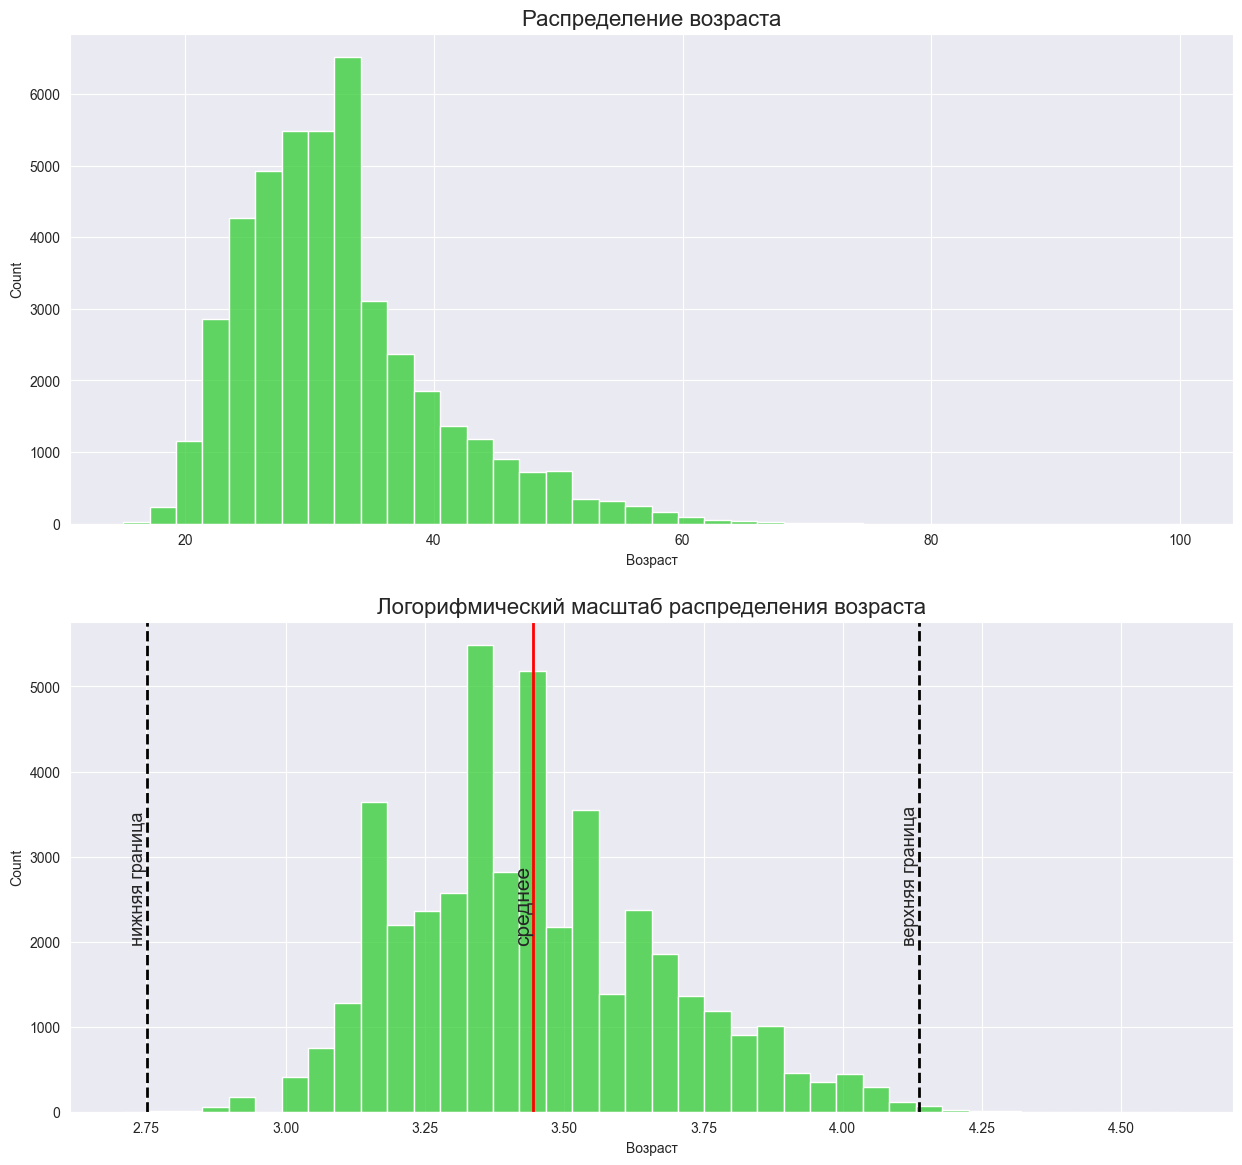

In [42]:
fig, axes = plt.subplots(2, 1, figsize=(15, 14))

#гистограмма исходного признака
histplot = sns.histplot(hh_data['Возраст'], bins=40, color='limegreen', ax=axes[0])
histplot.set_title('Распределение возраста', fontsize=16)

#гистограмма в логарифмическом масштабе
log_age= np.log(hh_data['Возраст'])
histplot = sns.histplot(log_age , bins=40, color='limegreen', ax=axes[1])
histplot.set_title('Логорифмический масштаб распределения возраста', fontsize=16)
histplot.axvline(log_age.mean(), color='r', lw=2)
histplot.axvline(log_age.mean() + 3*log_age.std(), color='black', lw=2, ls='--')
histplot.axvline(log_age.mean() - 3*log_age.std(), color='black', lw=2, ls='--');
histplot.text(log_age.mean(), 2000, 'среднее', ha='right', rotation=90, fontsize=15)
histplot.text(log_age.mean() + 3*log_age.std(), 2000, 'верхняя граница', ha='right', rotation=90, fontsize=13)
histplot.text(log_age.mean() - 3*log_age.std(), 2000, 'нижняя граница', ha='right', rotation=90, fontsize=13);


На графике мы видим, что распределение имеет правосторонюю ассиметрию, практически все значению входят в пределы нижней границы метода трех сигм, тогда как некоторые значения, выходящие за пределы верней грацицы, могут не являтся аномалиями, поэтому мы сделаем послабление в правую сторону.

In [43]:
def outliers_z_score(data, feature, log_scale=False, left=3, right=3):
    """Функция принимает DataFrame и признак, по которому ищутся выбросы. В дополнение добавим в функцию возможность 
    работы в логарифмическом масштабе: для этого введём аргумент log_scale. Если он равен True,
    то будем логарифмировать рассматриваемый признак, иначе — оставляем его в исходном виде. Так же в функции будут
    параметры left и right, которые будут задавать кол-во сигм(стандартных отклонений) в лево и право соответственно, по умолчанию 3

    Args:
        data (df): DataFrame
        feature (series): Столбец(признак) 
        log_scale (bool, optional): Defaults to False.
        left (int, optional): Defaults to 3.
        right (int, optional): Defaults to 3.

    Returns:
        df: функция возвращает выбросы и очищенные от них данные
    """
 
    if log_scale: # если log_scale=True
        x = np.log(data[feature]+1) # переводим в логарифмический масштаб и прибавляем к значениям в столбце 1
    else:
        x = data[feature] # в противном случае осталяем как есть
    
    mu = x.mean() #  вычислим математическое ожидание mu (среднее)
    sigma = x.std() # вычислим стандартное отклонение признака
    lower_bound = mu - left * sigma # найдем нижнюю границу интервала
    upper_bound = mu + right * sigma # верхнюю границу интервала
    outliers = data[(x < lower_bound) | (x > upper_bound)] # находим наблюдения, которые выходят за границы интервала
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)] # наблюдения, которые внутри границ
    
    return outliers, cleaned


out, hh_data = outliers_z_score(hh_data, 'Возраст', log_scale=True, right=4)
print(f'Количество выбросов, выявленных с помощью метода z-отклонений: {out.shape[0]}')
display(out)

Количество выбросов, выявленных с помощью метода z-отклонений: 3


,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы(месяц),Город,...,проектная работа,стажировка,волонтерство,полный день,удаленная работа,гибкий график,сменный график,вахтовый метод,ЗП (руб),Опыт работы(год)
31137,Менеджер по работе с клиентами,"ООО ""ФёрстКэшКомпани""",Менеджер по работе с клиентами,2019-04-06,Не указано,Среднее,М,15,2.0,Санкт-Петербург,...,False,False,False,False,True,True,True,False,10000.0,0.2
32950,Тестировщик игр,OOO ЖМЫХ,Тестировщик ПО,2019-04-09,Не указано,Среднее специальное,М,15,3.0,другие,...,False,False,False,True,False,False,False,False,2000.0,0.2
33654,Frontend-разработчик,Freelance,Frontend-разработчик,2019-04-19,Не указано,Среднее специальное,М,100,30.0,Санкт-Петербург,...,True,True,False,True,True,True,False,False,60000.0,2.5


Видим, что в выбросы попали резюме двух соискателей с возрастом 15 лет и один 100-летний. 